# Preliminary Individual DEA

## Purpose

This notebook is to explore the given data set individually to set the stage for group work discussion for the end of module 1 project of Flatiron School Data Science Immersive 091420-Manhattan Cohorrt. The notebook will serve as both code reference in the future and surface level data exploration of the given data set.

## Goal

The provided data set are series of information regarding movies. They will be explored to provide insight into current trend and success parameters to recommend a future course of movie creation of Microsoft Movie Studios. 

## Structure

The data set can be found in `./data` folder 
<br>
The data is pulled from following companies: 

- Box Office Mojo (prefix: bom)
- IMDB (prefix: imdb)
- Rotten Tomatoes (prefix: rt) (does not provide movie title?)
- TheMoiveDB.org (prefix: tmdb) (very confusing with imdb...)

## Initial Questions

- What studio has the best record in terms of margins/reviews? (Who to copy?)

- Which director has the best record in terms of margins/reviews

- What is the correlation between the budget and earnings
    - Larger production value tend to earn more profits, but there is a fall off point after 1mil

- What genre performs best?
    - among the top rated and most earning movies Drama was the most common followed by Action then Adventure
    - among the movies with best profit to budget ratio Drama had the overwhelming majority. Comedy, Horror, and Thrillers were also among the top genres

- Is there a genre that has been gaining more popularity?

- Is there a genre that performs the best for the money?


## Findings Summary

#### According to The Numbers (TN) data set
- The movie budget gas a positive correlation to the gross numbers.
- If a movie does well in domestic market, it is very likely to do well in worldwide market (0.94!)

#### According to Rotten Tomatoes (RT) data set
- The movie runtime has very little correlation to the review


### Contribution
Author - Yung Han Jeong
Team Member - Cierra Andaur

#### Library Import

In [1]:
import os
import pandas as pd
import numpy as np
import src.tools as tl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


#### Functions

***

In [7]:
df = tl.searchbytitle(bomgr_df, "title", tmdb_check_df, "final_title",["Toy Story 3", "Iron Man 2"])
df.head()

,studio,domestic_gross,foreign_gross,year,org_lang,org_title,popularity,release_date,vote_avg,vote_count
title,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,en,Toy Story 3,24.445,2010-06-17,7.7,8340
Iron Man 2,Par.,312400000.0,311500000,2010,en,Iron Man 2,28.515,2010-05-07,6.8,12368


#### Box Office Mojo

In [2]:
bomgr_df = pd.read_csv("data/bom.movie_gross.csv.gz")
bomgr_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [73]:
bomgr_df[bomgr_df.title == "Toy Story 3"]

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [40]:
tmdb_check_df[tmdb_check_df.final_title == "Toy Story 3"]

,org_lang,org_title,popularity,release_date,final_title,vote_avg,vote_count
7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340


In [4]:
bomgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### IMDB

IMDB data set is very separated, but provides with given key.

- imdb.name.basics: name of actor/staff memberds. ID'ed by nconst column and title_id list in known_for titles column
- imdb.title.akas: alternaitve tiltes of movies (title_id_ depending on the region)
- imdb.title.basics: movie title with basic info
- imdb.title.crew: list of directors and writers but ID'ed with nconst
- imdb.principals: principals actors/staffs? "Featuring"?
- imdb.rating: rating and number of reviews

In [18]:
i_basic_df = pd.read_csv("data/imdb.name.basics.csv.gz")
i_basic_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [19]:
i_aka_df = pd.read_csv("data/imdb.title.akas.csv.gz")
i_aka_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [20]:
i_title_basic_df = pd.read_csv("data/imdb.title.basics.csv.gz")
i_title_basic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [21]:
i_crew_df = pd.read_csv("data/imdb.title.crew.csv.gz")
i_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [22]:
i_principal_df = pd.read_csv("data/imdb.title.principals.csv.gz")
i_principal_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [24]:
i_rating_df = pd.read_csv("data/imdb.title.ratings.csv.gz")
i_rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


***
#### Merging some IMDB tables for further analysis
***

In [161]:
# To merge, the merging columns need to have same dtype. Run this cell to ensure
i_title_basic_df.tconst.astype(str)
i_rating_df.tconst.astype(str)

0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object

In [163]:
i_title_rating_df = i_title_basic_df.merge(i_rating_df, on = "tconst")

In [166]:
i_title_rating_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### This merge dropped half of the data points! Not all title has ratings

In [165]:
i_title_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [17]:
i_title_rating_df[i_title_rating_df["numvotes"] > 100].sort_values("averagerating", ascending = False)

NameError: name 'i_title_rating_df' is not defined

### Rotten Tomatoes

- rt.movie_info: informatino regarding the movies
- rt.reviews: reviews, but most ratings are in fresh or rotten

In [10]:
rt_info_df = pd.read_csv("data/rt.movie_info.tsv.gz", delimiter = "\t", encoding='ISO-8859-1' )
#thank you Tim Hintz and Eric Roberts for encoding info 
rt_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [100]:
rt_info_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [98]:
rt_info_df.id.count() #1135 reviews when grouped by ID

1560

In [11]:
rt_review_df = pd.read_csv("data/rt.reviews.tsv.gz", delimiter = "\t", encoding='ISO-8859-1' )
rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [88]:
rt_review_df.fresh.value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

Adding fresh_bool column to assign 1 or fresh 0 or rotten

In [91]:
rt_review_df["fresh_bool"] = rt_review_df["fresh"].apply(lambda txt: 1 if txt == "fresh" else 0)

In [155]:
#sanity check
#rt_review_df.head()

Calculate the ratio of the movie's "freshness" using the "fresh_bool" column made from above

In [115]:
rt_review_total = rt_review_df[["id", "fresh_bool"]].groupby("id").count() #tells us how many reviews there are per movide id
rt_review_fresh = rt_review_df[["id", "fresh_bool"]].groupby("id").sum() #tells us how many reviews marked it fresh per movie id
rt_review_fresh_ratio = rt_review_fresh / rt_review_total #vectorized calculation to get ratio
rt_review_fresh_ratio.columns = ["fresh_percent"] #rename the columns to make more sense

In [154]:
#sanity check
#rt_review_fresh_ratio.head()

In [122]:
rt_info_review_df = rt_info_df.join(rt_review_fresh_ratio, on="id", how="left")
rt_info_review_df = rt_info_review_df.set_index("id") #set index to movie id for cleaner look

In [153]:
#sanity check
#rt_info_review_df.head()

In [152]:
#rt_info_review_df.info() #running to check garbage data

According to the dataframe summary it seems that currency, box_office, and studio has a lot of null values and can be discarded (only ~20-30% complete data)

In [130]:
rt_info_review_df.drop(["currency", "box_office", "studio"], axis = 1, inplace = True) #YOU CAN ONLY RUN THIS ONCE

In [156]:
# Run below to fill NaN of runtime with filterable data (9999)
rt_info_review_df.runtime.fillna("9999 minutes", inplace = True) 

In [144]:
#converting runtime into integer, they should be all in minutes
rt_info_review_df.runtime = rt_info_review_df.runtime.apply(lambda txt: int(txt.split()[0]))

Now that it's a bit cleaner, doing a high level trend summary on runtime versus review

In [146]:
rt_info_review_df[rt_info_review_df.runtime < 9999].corr() #not much correlation between them

,runtime,fresh_percent
runtime,1.00000,0.16712
fresh_percent,0.16712,1.00000


### The Movie Database

In [3]:
tmdb_df = pd.read_csv("data/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tmdb_check_df = tmdb_df[["original_language", "original_title", "popularity", "release_date", "title", "vote_average", "vote_count"]]

In [5]:
tmdb_check_df.columns = ["org_lang", "org_title", "popularity", "release_date", "final_title", "vote_avg", "vote_count"]

In [6]:
tmdb_check_df.head()

,org_lang,org_title,popularity,release_date,final_title,vote_avg,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### TN is most likely to be "The Numbers" the-numbers.com

In [13]:
tn_budget_df = pd.read_csv("data/tn.movie_budgets.csv.gz")
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [68]:
tn_budget_df.info() #all budgets are strings initially

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [72]:
#using code below for number conversion
int("".join(x for x in "$410,600,000" if x.isnumeric()))

410600000

Below changes each columsn to numberic(int64) values.
<br>
#### REMINDER: BELOW CAN ONLY BE RAN ONCE SINCE IT REPLACES THE COLUMN. 
#### IF STRING VALUES ARE NEEDED REASSIGN COLUMNS OR RELOAD DATA

In [80]:
tn_budget_df["production_budget"] = tn_budget_df["production_budget"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [78]:
tn_budget_df["domestic_gross"] = tn_budget_df["domestic_gross"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [79]:
tn_budget_df["worldwide_gross"] = tn_budget_df["worldwide_gross"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [81]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [82]:
tn_budget_df.corr() #much better

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


According to the correlation table above:

- The movie budget gas a positive correlation to the gross numbers.
- If a movie does well in domestic market, it is very likely to do well in worldwide market (0.94!)

***
## Combining IMDB Rating and The Numbers table

#### i_title_rating_df + tn_budget_df

The joining will occur on the movie title. They will be cleaned for best formatting.

***

In [182]:
tn_i_budget_df = tn_budget_df #making a copy to preserve data

In [183]:
tn_i_budget_df.movie = tn_i_budget_df.movie.apply(lambda txt: "".join(txt.lower().split()))

In [202]:
tn_i_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",piratesofthecaribbean:onstrangertides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",darkphoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers:ageofultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",starwarsep.viii:thelastjedi,317000000,620181382,1316721747


In [200]:
len(tn_i_budget_df.movie.unique())

5698

In [236]:
i_tn_rating_df = i_title_rating_df.drop(["tconst", "primary_title","start_year"], axis = 1)

In [237]:
i_tn_rating_df.columns = ["movie", "runtime", "genres", "rating", "numvotes"]

In [238]:
i_tn_rating_df.movie = i_tn_rating_df.movie.apply(lambda txt: "".join(txt.lower().split()))

In [239]:
i_tn_rating_df.head()

,movie,runtime,genres,rating,numvotes
0,sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,ashadkaekdin,114.0,"Biography,Drama",7.2,43
2,theothersideofthewind,122.0,Drama,6.9,4517
3,sabsebadasukh,NaN,"Comedy,Drama",6.1,13
4,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy",6.5,119


In [240]:
len(i_tn_rating_df.movie.unique())

70944

In [324]:
i_tn_df = i_tn_rating_df.merge(tn_i_budget_df, on="movie").drop_duplicates("movie")

In [325]:
i_tn_df.info() #that is only about 50% of the movies from The Numbers and only 11% of IMDB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2721
Data columns (total 10 columns):
movie                2133 non-null object
runtime              2080 non-null float64
genres               2132 non-null object
rating               2133 non-null float64
numvotes             2133 non-null int64
id                   2133 non-null int64
release_date         2133 non-null object
production_budget    2133 non-null int64
domestic_gross       2133 non-null int64
worldwide_gross      2133 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 183.3+ KB


In [326]:
i_tn_df["profit"] = i_tn_df.worldwide_gross - i_tn_df.production_budget

In [327]:
#sanity check
#i_tn_df.head()

In [328]:
i_tn_df.describe()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
count,2080.000000,2133.000000,2.133000e+03,2133.000000,2.133000e+03,2.133000e+03,2.133000e+03,2.133000e+03
mean,103.962981,6.242194,8.310187e+04,50.798406,3.651870e+07,4.480138e+07,1.098687e+08,7.335001e+07
std,18.825394,1.155942,1.451825e+05,28.497336,4.996743e+07,7.508158e+07,2.059273e+08,1.698490e+08
min,5.000000,1.600000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,91.000000,5.600000,1.176000e+03,26.000000,5.000000e+06,5.142370e+05,2.592308e+06,-1.906067e+06
50%,102.000000,6.400000,2.670400e+04,51.000000,1.800000e+07,1.780430e+07,3.168181e+07,1.160399e+07
75%,114.250000,7.000000,9.705500e+04,75.000000,4.450000e+07,5.476749e+07,1.129142e+08,7.137741e+07
max,189.000000,9.200000,1.841066e+06,100.000000,4.106000e+08,7.000596e+08,2.208208e+09,2.008208e+09


***
Checking correlation in the combined data set. Also checking correlation when subsetted by rating

In [329]:
i_tn_df.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.263125,0.430062,-0.029784,0.325491,0.275769,0.293765,0.260063
rating,0.263125,1.000000,0.380324,-0.019754,0.158719,0.225422,0.212471,0.210910
numvotes,0.430062,0.380324,1.000000,-0.012313,0.537496,0.624182,0.616233,0.589005
id,-0.029784,-0.019754,-0.012313,1.000000,-0.059026,-0.021024,-0.035214,-0.025329
production_budget,0.325491,0.158719,0.537496,-0.059026,1.000000,0.715940,0.780109,0.651627
domestic_gross,0.275769,0.225422,0.624182,-0.021024,0.715940,1.000000,0.945485,0.935698
worldwide_gross,0.293765,0.212471,0.616233,-0.035214,0.780109,0.945485,1.000000,0.982916
profit,0.260063,0.210910,0.589005,-0.025329,0.651627,0.935698,0.982916,1.000000


In [330]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 7.5].count()[0])
i_tn_df[i_tn_df.rating > 7.5].corr()

movies in this data set 226


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,-0.075798,0.534977,0.053465,0.320732,0.313206,0.361672,0.357921
rating,-0.075798,1.000000,0.013416,-0.034644,0.001102,-0.026304,0.007777,0.009134
numvotes,0.534977,0.013416,1.000000,-0.029537,0.609421,0.638106,0.650078,0.634798
id,0.053465,-0.034644,-0.029537,1.000000,-0.130674,-0.119085,-0.118637,-0.111007
production_budget,0.320732,0.001102,0.609421,-0.130674,1.000000,0.825031,0.872760,0.807000
domestic_gross,0.313206,-0.026304,0.638106,-0.119085,0.825031,1.000000,0.960201,0.956324
worldwide_gross,0.361672,0.007777,0.650078,-0.118637,0.872760,0.960201,1.000000,0.992595
profit,0.357921,0.009134,0.634798,-0.111007,0.807000,0.956324,0.992595,1.000000


In [331]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 8].count()[0])
i_tn_df[i_tn_df.rating > 8].corr()

movies in this data set 80


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,-0.293821,0.671367,0.039899,0.412601,0.383083,0.437943,0.434149
rating,-0.293821,1.000000,-0.154657,0.050042,-0.054785,-0.102766,-0.070345,-0.072137
numvotes,0.671367,-0.154657,1.000000,-0.067788,0.726567,0.673229,0.671957,0.644165
id,0.039899,0.050042,-0.067788,1.000000,-0.192580,-0.137735,-0.172526,-0.164057
production_budget,0.412601,-0.054785,0.726567,-0.192580,1.000000,0.897348,0.912583,0.871911
domestic_gross,0.383083,-0.102766,0.673229,-0.137735,0.897348,1.000000,0.971916,0.965645
worldwide_gross,0.437943,-0.070345,0.671957,-0.172526,0.912583,0.971916,1.000000,0.995911
profit,0.434149,-0.072137,0.644165,-0.164057,0.871911,0.965645,0.995911,1.000000


In [332]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 8.5].count()[0])
i_tn_df[i_tn_df.rating > 8.5].corr()

movies in this data set 19


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.014735,0.861585,-0.167046,0.832305,0.759587,0.819511,0.811035
rating,0.014735,1.000000,-0.139741,0.081105,-0.213938,-0.205922,-0.213369,-0.207193
numvotes,0.861585,-0.139741,1.000000,-0.106528,0.867015,0.904860,0.945903,0.939662
id,-0.167046,0.081105,-0.106528,1.000000,0.025216,-0.064112,-0.122750,-0.157703
production_budget,0.832305,-0.213938,0.867015,0.025216,1.000000,0.877782,0.912886,0.864472
domestic_gross,0.759587,-0.205922,0.904860,-0.064112,0.877782,1.000000,0.979712,0.978499
worldwide_gross,0.819511,-0.213369,0.945903,-0.122750,0.912886,0.979712,1.000000,0.994366
profit,0.811035,-0.207193,0.939662,-0.157703,0.864472,0.978499,0.994366,1.000000


In [333]:
million_dollar_movie = i_tn_df[i_tn_df["profit"] > 1000000]
print("Movies that made over $1mil in this data set", len(million_dollar_movie))
million_dollar_movie.corr()

Movies that made over $1mil in this data set 1282


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.288608,0.454810,-0.013888,0.311676,0.258334,0.286281,0.257114
rating,0.288608,1.000000,0.422675,-0.040345,0.116608,0.194902,0.185642,0.191009
numvotes,0.454810,0.422675,1.000000,-0.030105,0.490230,0.558495,0.554139,0.530245
id,-0.013888,-0.040345,-0.030105,1.000000,-0.078716,-0.053280,-0.069303,-0.061427
production_budget,0.311676,0.116608,0.490230,-0.078716,1.000000,0.700708,0.785322,0.665753
domestic_gross,0.258334,0.194902,0.558495,-0.053280,0.700708,1.000000,0.935223,0.930460
worldwide_gross,0.286281,0.185642,0.554139,-0.069303,0.785322,0.935223,1.000000,0.984776
profit,0.257114,0.191009,0.530245,-0.061427,0.665753,0.930460,0.984776,1.000000


In [334]:
hmillion_dollar_movie = i_tn_df[i_tn_df["profit"] > 100000000]
print("Movies that made over $100mil in this data set", len(hmillion_dollar_movie))
hmillion_dollar_movie.corr()

Movies that made over $100mil in this data set 424


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.316607,0.509403,-0.060839,0.294494,0.236851,0.278040,0.245441
rating,0.316607,1.000000,0.535771,-0.029343,0.119616,0.239167,0.197577,0.198757
numvotes,0.509403,0.535771,1.000000,-0.064716,0.338074,0.414005,0.384614,0.359171
id,-0.060839,-0.029343,-0.064716,1.000000,-0.164528,-0.114236,-0.141074,-0.121057
production_budget,0.294494,0.119616,0.338074,-0.164528,1.000000,0.557259,0.696553,0.548253
domestic_gross,0.236851,0.239167,0.414005,-0.114236,0.557259,1.000000,0.894827,0.896082
worldwide_gross,0.278040,0.197577,0.384614,-0.141074,0.696553,0.894827,1.000000,0.981946
profit,0.245441,0.198757,0.359171,-0.121057,0.548253,0.896082,0.981946,1.000000


In [335]:
fhmillion_dollar_movie = i_tn_df[i_tn_df["profit"] > 500000000]
print("Movies that made over $500mil in this data set", len(fhmillion_dollar_movie))
fhmillion_dollar_movie.corr()

Movies that made over $500mil in this data set 74


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.278271,0.541967,-0.289927,0.444300,0.089767,0.182633,0.070758
rating,0.278271,1.000000,0.618367,-0.252429,0.171866,0.121570,0.036418,-0.004143
numvotes,0.541967,0.618367,1.000000,-0.239485,0.193632,0.093567,-0.053301,-0.107404
id,-0.289927,-0.252429,-0.239485,1.000000,-0.321214,-0.116287,-0.223260,-0.161281
production_budget,0.444300,0.171866,0.193632,-0.321214,1.000000,0.227751,0.452298,0.237715
domestic_gross,0.089767,0.121570,0.093567,-0.116287,0.227751,1.000000,0.784682,0.796550
worldwide_gross,0.182633,0.036418,-0.053301,-0.223260,0.452298,0.784682,1.000000,0.973819
profit,0.070758,-0.004143,-0.107404,-0.161281,0.237715,0.796550,0.973819,1.000000


In [336]:
budget_rating_75th = i_tn_df[(i_tn_df.rating > 7)&(i_tn_df.production_budget > 40000000)&(i_tn_df.profit > 40000000)].drop_duplicates("movie")
print("There are this many movies in 75th percentile when divided by rating and budget", len(budget_rating_75th))
budget_rating_75th.describe()

There are this many movies in 75th percentile when divided by rating and budget 128


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
count,128.000000,128.000000,1.280000e+02,128.000000,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,120.148438,7.578906,3.804610e+05,44.890625,1.245081e+08,2.020745e+08,5.250895e+08,4.005814e+08
std,25.968815,0.399932,3.134981e+05,26.426613,6.354279e+07,1.335239e+08,3.512686e+08,3.065307e+08
min,5.000000,7.100000,5.000000e+00,2.000000,4.100000e+07,4.348227e+07,9.765154e+07,4.520382e+07
25%,103.750000,7.275000,1.430725e+05,25.000000,6.800000e+07,1.031885e+08,2.356786e+08,1.562548e+08
50%,120.500000,7.500000,3.343100e+05,41.500000,1.225000e+08,1.710537e+08,4.691839e+08,3.306913e+08
75%,138.500000,7.800000,5.283755e+05,67.250000,1.700000e+08,2.557860e+08,6.979351e+08,5.474193e+08
max,180.000000,8.800000,1.841066e+06,99.000000,3.306000e+08,7.000596e+08,2.048134e+09,1.748134e+09


In [345]:
check = budget_rating_75th.sort_values("profit", ascending = False)


In [338]:
budget_rating_75th.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.253300,0.552324,0.065894,0.236879,0.205746,0.254963,0.243071
rating,0.253300,1.000000,0.637039,-0.042761,0.227285,0.224121,0.300072,0.296752
numvotes,0.552324,0.637039,1.000000,-0.046155,0.363495,0.415397,0.443460,0.432831
id,0.065894,-0.042761,-0.046155,1.000000,-0.146487,-0.124184,-0.137365,-0.127048
production_budget,0.236879,0.227285,0.363495,-0.146487,1.000000,0.617264,0.749672,0.651790
domestic_gross,0.205746,0.224121,0.415397,-0.124184,0.617264,1.000000,0.919755,0.926036
worldwide_gross,0.254963,0.300072,0.443460,-0.137365,0.749672,0.919755,1.000000,0.990545
profit,0.243071,0.296752,0.432831,-0.127048,0.651790,0.926036,0.990545,1.000000


In [339]:
topgenres = budget_rating_75th.genres.dropna().unique()

In [341]:
print(unpack_genre(topgenres))

{'western': 1, 'music': 1, 'sport': 2, 'musical': 2, 'romance': 2, 'war': 2, 'documentary': 4, 'history': 4, 'fantasy': 5, 'animation': 5, 'crime': 6, 'mystery': 6, 'family': 6, 'sci-fi': 7, 'thriller': 10, 'comedy': 11, 'biography': 12, 'adventure': 17, 'action': 20, 'drama': 29}


In [347]:
i_tn_df["earning_ratio"] = i_tn_df.profit / i_tn_df.production_budget
best_budget_ratio = i_tn_df[i_tn_df.earning_ratio > 10].sort_values("earning_ratio", ascending = False)
best_budget_ratio.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit,earning_ratio
runtime,1.000000,0.303648,0.350898,0.050215,0.123125,0.112286,0.159916,0.162187,-0.187890
rating,0.303648,1.000000,0.456829,0.167232,0.105152,0.102958,0.092002,0.090558,-0.181130
numvotes,0.350898,0.456829,1.000000,0.088795,0.241444,0.315855,0.271898,0.273773,-0.166000
id,0.050215,0.167232,0.088795,1.000000,-0.008263,-0.031036,-0.017078,-0.017808,-0.043553
production_budget,0.123125,0.105152,0.241444,-0.008263,1.000000,0.913006,0.968581,0.962866,-0.155281
domestic_gross,0.112286,0.102958,0.315855,-0.031036,0.913006,1.000000,0.950321,0.950751,-0.074508
worldwide_gross,0.159916,0.092002,0.271898,-0.017078,0.968581,0.950321,1.000000,0.999757,-0.081663
profit,0.162187,0.090558,0.273773,-0.017808,0.962866,0.950751,0.999757,1.000000,-0.074894
earning_ratio,-0.187890,-0.181130,-0.166000,-0.043553,-0.155281,-0.074508,-0.081663,-0.074894,1.000000


In [343]:
best_budget_ratio_genres = best_budget_ratio.genres.dropna().unique()

In [344]:
print(unpack_genre(best_budget_ratio_genres))

{'animation': 1, 'sport': 2, 'documentary': 3, 'family': 3, 'music': 4, 'fantasy': 5, 'sci-fi': 5, 'adventure': 5, 'mystery': 5, 'crime': 5, 'action': 9, 'romance': 9, 'biography': 10, 'horror': 11, 'thriller': 12, 'comedy': 13, 'drama': 31}


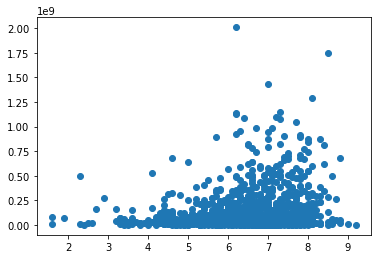

In [353]:
fig, ax = plt.subplots()

x1 = million_dollar_movie.rating
y1 = million_dollar_movie.profit

plt.scatter(x1,y1)

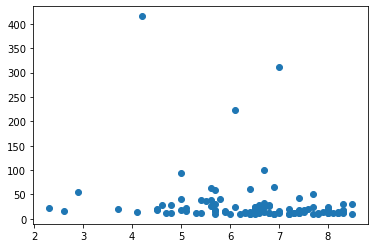

In [354]:
fig, ax = plt.subplots()
x2 = best_budget_ratio.rating
y2 = best_budget_ratio.earning_ratio

plt.scatter(x2,y2)